# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
import pandas as pd
import numpy as np
import random as rnd
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, f1_score
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import joblib



In [3]:
eclipse_jdt = pd.read_csv("./data/eclipsejdt.csv",sep=";")
eclipse_pdt = pd.read_csv("./data/eclipsepde.csv",sep=";")
equinox = pd.read_csv("./data/equinox.csv",sep=";")
lucene = pd.read_csv("./data/lucene.csv",sep=";")
mylyn = pd.read_csv("./data/mylyn.csv",sep=";")

In [4]:
print("Data Shapes:", eclipse_jdt.shape, eclipse_pdt.shape, equinox.shape, lucene.shape, mylyn.shape)
df = pd.concat([eclipse_jdt, eclipse_pdt, equinox, lucene, mylyn], ignore_index=True)
df.columns = df.columns.str.replace(' ', '')
print("Full dataframe shape:",df.shape, '\n')
print("Predictors:")
for name in df.columns.values[1:18].tolist():
    print(name, end=', ')
print("\n\nPredictable:", df.columns.values[18])
df.head()

Data Shapes: (997, 24) (1497, 24) (324, 24) (691, 24) (1862, 24)
Full dataframe shape: (5371, 24) 

Predictors:
cbo, dit, fanIn, fanOut, lcom, noc, numberOfAttributes, numberOfAttributesInherited, numberOfLinesOfCode, numberOfMethods, numberOfMethodsInherited, numberOfPrivateAttributes, numberOfPrivateMethods, numberOfPublicAttributes, numberOfPublicMethods, rfc, wmc, 

Predictable: bugs


,classname,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,...,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,
0,org::eclipse::jdt::internal::core::search::ind...,9,2,1,9,15,0,1,8,122.0,...,1.0,5,34.0,20.0,0,0,0,0,0,
1,org::eclipse::jdt::internal::compiler::codegen...,1,1,1,0,0,0,2,0,4.0,...,2.0,1,1.0,1.0,0,0,0,0,0,
2,org::eclipse::jdt::internal::compiler::ast::AS...,114,1,102,18,190,6,131,249,484.0,...,3.0,19,156.0,176.0,1,0,0,0,0,
3,org::eclipse::jdt::internal::compiler::lookup:...,5,6,1,4,10,0,0,61,33.0,...,0.0,4,18.0,12.0,0,0,0,0,0,
4,org::eclipse::jdt::internal::eval::CodeSnippet...,23,2,1,22,820,0,7,416,673.0,...,7.0,1,174.0,115.0,0,0,0,0,0,


In [5]:
X = df[['cbo', 'dit', 'fanIn', 'fanOut', 'lcom', 'noc', 'numberOfAttributes', 'numberOfAttributesInherited','numberOfLinesOfCode','numberOfMethods','numberOfMethodsInherited','numberOfPrivateAttributes','numberOfPrivateMethods','numberOfPublicAttributes','numberOfPublicMethods','rfc', 'wmc']]
y = df['bugs']


In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
y = y.where(y <= 2, 2)

In [8]:
print("X:", X_scaled.shape)
print("y:", y.shape)
((y.index == X.index).sum())
print("Orijinal veri boyutları:")
print("X:", X_scaled.shape, "y:", y.shape)

X: (5371, 17)
y: (5371,)
Orijinal veri boyutları:
X: (5371, 17) y: (5371,)


Classes: [0, 1, 2]
Counts: [4518, 598, 255]


Text(0.5, 0, '# Bugs')

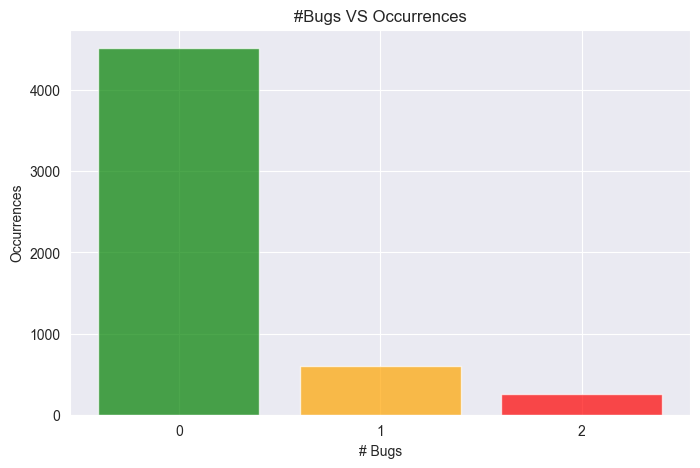

In [9]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs")

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],          # Ağaç sayısı
    'max_features': ['auto', 'sqrt', 'log2'], # Özellik sayısı
    'max_depth': [None, 10, 20, 30],          # Ağaç derinliği
    'min_samples_split': [2, 5, 10],          # Dallanma için minimum örnek
    'min_samples_leaf': [1, 2, 4],            # Yaprak düğüm için minimum örnek
    'class_weight': [None, 'balanced']         # Sınıf ağırlıkları
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2, n_jobs=-1)
grid.fit(X_scaled, y)

print(grid.best_params_)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

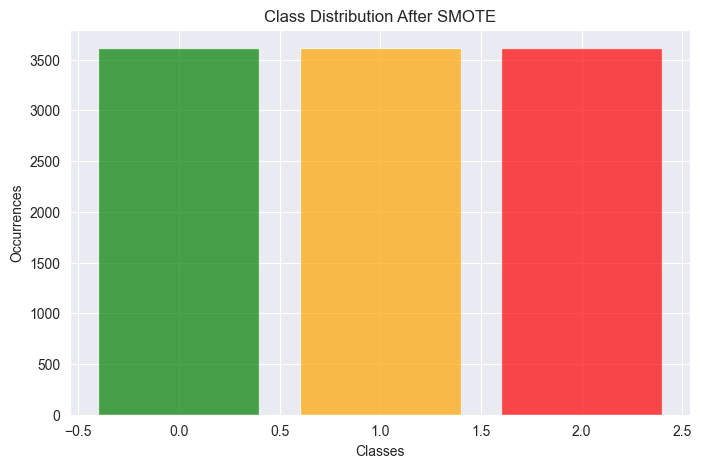

In [12]:
unique_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
plt.figure(figsize=(8, 5))
plt.bar(unique_resampled, counts_resampled, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("Class Distribution After SMOTE")
plt.ylabel("Occurrences")
plt.xlabel("Classes")
plt.show()

In [13]:
model = RandomForestClassifier(n_estimators=1000, max_features=0.4, max_depth=200, criterion='entropy', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=200, max_features=0.4,
                       n_estimators=1000, random_state=42)

In [14]:
y_pred = model.predict(X_test)
print(f"\nDoğruluk: {accuracy_score(y_test, y_pred)}")
print(f"Sınıflandırma Raporu:\n{classification_report(y_test, y_pred)}")

# F1 skoru
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Skoru: {f1}")


Doğruluk: 0.8344186046511628
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       904
           1       0.37      0.25      0.30       120
           2       0.36      0.29      0.32        51

    accuracy                           0.83      1075
   macro avg       0.54      0.50      0.51      1075
weighted avg       0.81      0.83      0.82      1075

F1 Skoru: 0.8209377816419091


In [17]:
min_values = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Minimum değerler
max_values = [200, 10, 150, 30, 300, 10, 200, 300, 500, 50, 20, 5, 5, 10, 50, 300, 300]  # Maksimum değerler

# MinMaxScaler eğitim için min ve max değerleri birleştir
example_data = np.array([min_values, max_values])
scaler = MinMaxScaler()
scaler.fit(example_data)

# Verilen ölçeklenmemiş değerler
original_X = np.array([[100, 100, 100, 80, 50, 60, 40, 40, 40.0, 150.0, 80, 100, 100, 30.0, 190, 100.0, 140.0]])

# MinMaxScaler ile ölçekle
scaled_X = scaler.transform(original_X)

# Sonuçları yazdır
print("Orijinal X:", original_X)
print("MinMaxScaler Uygulanmış X:", scaled_X)

Orijinal X: [[100. 100. 100.  80.  50.  60.  40.  40.  40. 150.  80. 100. 100.  30.
  190. 100. 140.]]
MinMaxScaler Uygulanmış X: [[ 0.5        10.          0.66666667  2.66666667  0.16666667  6.
   0.2         0.13333333  0.08        3.          4.         20.
  20.          3.          3.8         0.33333333  0.46666667]]


In [18]:
y_pred = model.predict(scaled_X)
print(f"Tahmin edilen sınıf: {y_pred[0]}")

Tahmin edilen sınıf: 2


In [19]:
joblib.dump(model, 'models/mk2plus.pkl')
print("Model başarıyla kaydedildi: mk1plus.pkl")

Model başarıyla kaydedildi: mk1plus.pkl


In [20]:
joblib.dump(scaler, './scaler/scaler.pkl')


['./scaler/scaler.pkl']